In [33]:
import pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,roc_auc_score,RocCurveDisplay,PrecisionRecallDisplay
import numpy as np
import glob
from scipy.stats import ttest_ind,binom_test
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
!pwd

/sise/liorrk-group/OrDanOfir/NLP


In [3]:
def get_ensemble_score(pkl,ensemble_name):
    group = []
    type_mode = []
    Score = []
    Names = []
    for p in pkl:
        if "small" in p:
            n = "small"
        elif "large" in p:
            n = "large"
        else:
            n = "base"
        type_mode.append(n)
        name=p.split("/")[1]
        df=pd.read_pickle(p)
        # mae,rmse = mean_absolute_error(df['label_mean'],df['pred_label_mean'])*4,np.sqrt(mean_squared_error(df['label_mean'],df['pred_label_mean']))*4
        mae,rmse = roc_auc_score(df['label_mean'],df['pred_label_mean'])*100,0
        r2 = r2_score(df['label_mean'],df['pred_label_mean'])
        X = df[['pred_label_mean']].values
        y = df['label_mean'].values
        x = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        p_value = model.f_pvalue
        group.append(df['pred_label_mean'].tolist())
        Score.append([mae,rmse,p_value,r2])
        Names.append(name)
    RMSE = roc_auc_score(df['label_mean'].values,np.array(group).mean(0))
    MAE = roc_auc_score(df['label_mean'].values,np.array(group).mean(0))*100
    r2 = r2_score(df['label_mean'].values,np.array(group).mean(0))
    Score.append([MAE,RMSE,0,r2])
    Names.append("ensemble")
    type_mode.append("ensemble")
    base_df = pd.DataFrame(Score,columns=['AUC','rmse','p_vlaue','r2'])
    base_df['model'] = Names
    base_df['type_mode'] = type_mode
    base_df['exp'] = [row.split("/")[0] for row in pkl] + [ensemble_name]
    base_df
    return group,type_mode,y,Score,Names,base_df

# baseline ensemble

In [5]:
pkl = [row for row in glob.glob("Gab_baseline_cla/*/*.pkl") if "_cla" in row]
group,type_mode,y,Score,Names,base_df = get_ensemble_score(pkl,ensemble_name='baseline')
base_df

,AUC,rmse,p_vlaue,r2,model,type_mode,exp
0,79.610363,0.000000,0.0,0.149835,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,Gab_baseline_cla
1,81.509907,0.000000,0.0,0.194467,microsoft.deberta-v3-base,base,Gab_baseline_cla
2,80.942585,0.000000,0.0,0.159039,microsoft.deberta-v3-large,large,Gab_baseline_cla
3,82.160657,0.821607,0.0,0.201997,ensemble,ensemble,baseline


# toxigen_backtranslate ensemble

In [6]:
# pkl = [row for row in glob.glob("implicit_toxigen_backtranslate_cla/*/*.pkl") if "_cla" in row]
# group,type_mode,y,Score,Names,toxigen_df = get_ensemble_score(pkl,ensemble_name='outputs_toxigen_backtranslate_classification')
# toxigen_df

# backtranslate ensemble

In [7]:
pkl = [row for row in glob.glob("Gab_backtranslate_cla/*/*.pkl") if "_cla" in row]
group,type_mode,y,Score,Names,backtranslate_df = get_ensemble_score(pkl,ensemble_name='backtranslate_classification')
backtranslate_df

,AUC,rmse,p_vlaue,r2,model,type_mode,exp
0,80.625763,0.000000,0.0,0.168863,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,Gab_backtranslate_cla
1,80.742969,0.000000,0.0,0.170293,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,Gab_backtranslate_cla
2,81.931279,0.000000,0.0,0.188162,microsoft.deberta-v3-base,base,Gab_backtranslate_cla
3,82.086037,0.000000,0.0,0.190622,microsoft.deberta-v3-base,base,Gab_backtranslate_cla
4,80.338645,0.000000,0.0,0.171013,microsoft.deberta-v3-large,large,Gab_backtranslate_cla
5,80.108152,0.000000,0.0,0.169394,microsoft.deberta-v3-large,large,Gab_backtranslate_cla
6,82.550863,0.825509,0.0,0.207469,ensemble,ensemble,backtranslate_classification


# ensemble all models

In [8]:
pkl = [row for row in glob.glob("Gab*/*/*.pkl") if "_cla" in row]
group,type_mode,y,Score,Names,all_df = get_ensemble_score(pkl,ensemble_name='all')
all_df = all_df[all_df.model=='ensemble']
all_df

,AUC,rmse,p_vlaue,r2,model,type_mode,exp
9,82.593713,0.825937,0.0,0.209025,ensemble,ensemble,all


In [9]:
# df_sum = pd.concat([base_df,toxigen_df,backtranslate_df,all_df])
df_sum = pd.concat([base_df,backtranslate_df,all_df])

df_sum

,AUC,rmse,p_vlaue,r2,model,type_mode,exp
0,79.610363,0.000000,0.0,0.149835,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,Gab_baseline_cla
1,81.509907,0.000000,0.0,0.194467,microsoft.deberta-v3-base,base,Gab_baseline_cla
2,80.942585,0.000000,0.0,0.159039,microsoft.deberta-v3-large,large,Gab_baseline_cla
3,82.160657,0.821607,0.0,0.201997,ensemble,ensemble,baseline
0,80.625763,0.000000,0.0,0.168863,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,Gab_backtranslate_cla
1,80.742969,0.000000,0.0,0.170293,Narrativaai.deberta-v3-small-finetuned-hate_sp...,small,Gab_backtranslate_cla
2,81.931279,0.000000,0.0,0.188162,microsoft.deberta-v3-base,base,Gab_backtranslate_cla
3,82.086037,0.000000,0.0,0.190622,microsoft.deberta-v3-base,base,Gab_backtranslate_cla
4,80.338645,0.000000,0.0,0.171013,microsoft.deberta-v3-large,large,Gab_backtranslate_cla
5,80.108152,0.000000,0.0,0.169394,microsoft.deberta-v3-large,large,Gab_backtranslate_cla


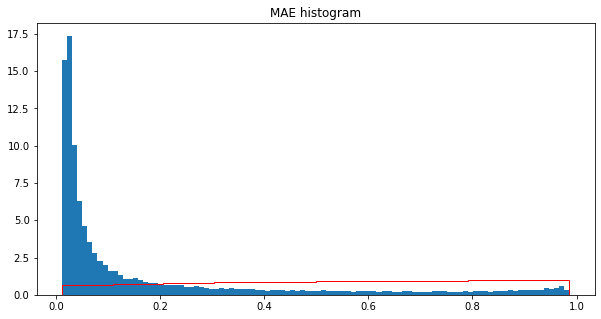

In [10]:
plt.figure(figsize=[10,5])
A = abs(np.array(group).mean(0)-y)
plt.hist(A,density=True,bins=100)
plt.hist(A,density=True, cumulative=True, label='CDF', histtype='step',color='red')
plt.title("MAE histogram")
plt.show()

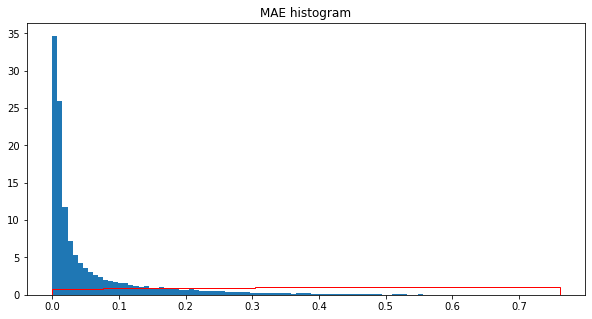

In [11]:
plt.figure(figsize=[10,5])
A = abs(np.array(group)[5]-np.array(group)[0])
plt.hist(A,density=True,bins=100)
plt.hist(A,density=True, cumulative=True, label='CDF', histtype='step',color='red')
plt.title("MAE histogram")
plt.show()

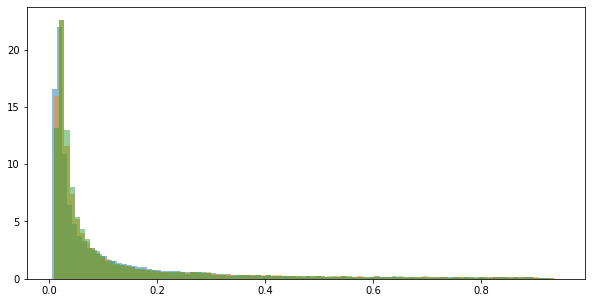

In [12]:
plt.figure(figsize=[10,5])
for g in group[2:5]:
    plt.hist(g,density=True,bins=100,alpha=0.5)


(array([954., 614., 480., 394., 345., 331., 281., 230., 224., 135.]),
 array([0.05686906, 0.40052489, 0.74418072, 1.08783655, 1.43149237,
        1.7751482 , 2.11880403, 2.46245986, 2.80611569, 3.14977151,
        3.49342734]),
 <BarContainer object of 10 artists>)

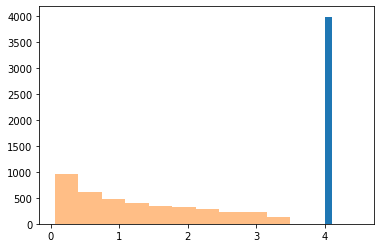

In [13]:
plt.hist(y[np.where(y*4>2)]*4)
plt.hist(np.array(group).mean(0)[np.where(y*4>2)]*4,alpha=0.5)

In [14]:
from scipy import stats
stats.friedmanchisquare(group[0], group[1], group[2])

FriedmanchisquareResult(statistic=12614.282001959858, pvalue=0.0)

Text(0.5, 1.0, 'parler-hate-speech ROC curve')

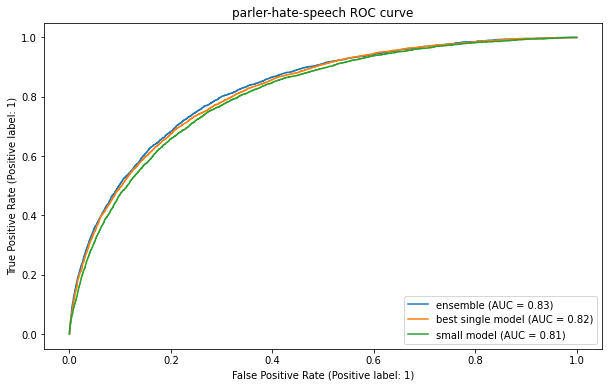

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
RocCurveDisplay.from_predictions(
                            y,
                            np.array(group).mean(0),
                            name=f"ensemble",ax=ax
                        )
RocCurveDisplay.from_predictions(
                            y,
                            np.array(group)[-3],
                            name=f"best single model",ax=ax
                        )
RocCurveDisplay.from_predictions(
                            y,
                            np.array(group)[2],
                            name=f"small model",ax=ax
                        )
ax.set_title("parler-hate-speech ROC curve")

In [23]:
np.array(group[0]).max()

0.929262101650238